In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split 

In [2]:
import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data=pd.read_csv('../DS InternSavy/Batsman_Data.csv')
data1=pd.read_csv('../DS InternSavy/Bowler_data.csv')
data2=pd.read_csv('../DS InternSavy/Ground_Averages.csv')
data3=pd.read_csv('../DS InternSavy/ODI_Match_Results.csv')
data4=pd.read_csv('../DS InternSavy/ODI_Match_Totals.csv')
data5=pd.read_csv('../DS InternSavy/WC_players.csv')

In [4]:
data.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


In [5]:
data1.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


In [6]:
data2.head()

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16


In [7]:
data3.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,418,won,85 runs,NaN,lost,1st,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,692,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,419,lost,10 runs,NaN,lost,2nd,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,693,won,10 runs,NaN,won,1st,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,121,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [8]:
data4.head()

,Unnamed: 0,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Start Date,Match_ID,Country,Country_ID
0,412,250,48.3,5.15,NaN,1,won,v India,Kolkata,3 Jan 2013,ODI # 3315,Pakistan,7
1,680,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,3 Jan 2013,ODI # 3315,India,6
2,413,157,48.5,3.21,168.0,2,lost,v India,Delhi,6 Jan 2013,ODI # 3316,Pakistan,7
3,681,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,6 Jan 2013,ODI # 3316,India,6
4,117,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,11 Jan 2013,ODI # 3317,SriLanka,8


In [9]:
data5.head()

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan


In [10]:
df=[data, data1,data2, data3, data4, data5]

In [11]:
def dementions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [12]:
dementions(df)

(11149, 13)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB
None
****************************************************************************************************
Unnamed: 0    0
Bat1 

In [14]:
# Lets Check the Duplicates if avilable 
def remove_duplicates(df):
    for i in df:
        i.drop_duplicates(inplace=True)
        print(i.shape)
        print('*'*100)

In [15]:
# Lets understand data at high level check the stastics of dataset
def stat_summary(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)

In [16]:
stat_summary(df)

         Unnamed: 0   Bat1   Runs     BF     SR     4s     6s   Opposition  \
count   11149.00000  11149  11149  11149  11149  11149  11149        11149   
unique          NaN    323    180    163   2032     26     17           22   
top             NaN    DNB      -      -      -      0      0  v Sri Lanka   
freq            NaN   2043   2231   2231   2331   2901   6368         1283   
mean     5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
std      3218.58341    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
min         1.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
25%      2788.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
50%      5575.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
75%      8362.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   
max     11149.00000    NaN    NaN    NaN    NaN    NaN    NaN          NaN   

       Ground   Start Date    Match_ID    Batsman     Player_ID

In [18]:
def seprate_date(df):
    for i in range(len(df)):
        if 'Start Date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['Start Date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day)  # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year)  # Extracting year
            print(df[i].head())
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have 'Satrt Date' column")
            print("-------------------------")

In [19]:
seprate_date(df)

   Unnamed: 0 Bat1 Runs BF SR 4s 6s    Opposition   Ground   Start Date  \
0           1  DNB    -  -  -  -  -       v India   Nagpur  18 Dec 2009   
1           2  DNB    -  -  -  -  -       v India  Kolkata  24 Dec 2009   
2           3  DNB    -  -  -  -  -       v India    Delhi  27 Dec 2009   
3           4  DNB    -  -  -  -  -  v Bangladesh    Dhaka   4 Jan 2010   
4           5  DNB    -  -  -  -  -       v India    Dhaka   5 Jan 2010   

     Match_ID        Batsman  Player_ID       Year  Month  Day  year  
0  ODI # 2933  Oshane Thomas      49619 2009-12-18     12   18  2009  
1  ODI # 2935  Oshane Thomas      49619 2009-12-24     12   24  2009  
2  ODI # 2936  Oshane Thomas      49619 2009-12-27     12   27  2009  
3  ODI # 2937  Oshane Thomas      49619 2010-01-04      1    4  2010  
4  ODI # 2938  Oshane Thomas      49619 2010-01-05      1    5  2010  
-------------------------
   Unnamed: 0 Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground  \
0           1   8

In [20]:
# Drop irrelavent columns from the datasets
def drop_irrelevant(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'Start Date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]
        
        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print(df[i].head())  # Printing the DataFrame after dropping columns
            print("-------------------------")
        else:
            print("DataFrame", i, "does not have any irrelevant columns")
            print("-------------------------")

In [21]:
drop_irrelevant(df)

DataFrame 0 after dropping irrelevant columns:
  Bat1 Runs BF SR 4s 6s    Opposition   Ground    Match_ID        Batsman  \
0  DNB    -  -  -  -  -       v India   Nagpur  ODI # 2933  Oshane Thomas   
1  DNB    -  -  -  -  -       v India  Kolkata  ODI # 2935  Oshane Thomas   
2  DNB    -  -  -  -  -       v India    Delhi  ODI # 2936  Oshane Thomas   
3  DNB    -  -  -  -  -  v Bangladesh    Dhaka  ODI # 2937  Oshane Thomas   
4  DNB    -  -  -  -  -       v India    Dhaka  ODI # 2938  Oshane Thomas   

   Player_ID  Month  Day  year  
0      49619     12   18  2009  
1      49619     12   24  2009  
2      49619     12   27  2009  
3      49619      1    4  2010  
4      49619      1    5  2010  
-------------------------
DataFrame 1 after dropping irrelevant columns:
  Overs Mdns Runs Wkts  Econ    Ave    SR    Opposition   Ground    Match_ID  \
0   8.0    0   57    0  7.12      -     -       v India   Nagpur  ODI # 2933   
1  10.0    0   55    2  5.50  27.50  30.0       v India  Ko

In [22]:
data

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,DNB,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas,49619,12,18,2009
1,DNB,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas,49619,12,24,2009
2,DNB,-,-,-,-,-,v India,Delhi,ODI # 2936,Oshane Thomas,49619,12,27,2009
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,ODI # 2937,Oshane Thomas,49619,1,4,2010
4,DNB,-,-,-,-,-,v India,Dhaka,ODI # 2938,Oshane Thomas,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11144,46,46,61,75.40,6,1,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,352048,2,28,2019
11145,3,3,6,50.00,0,0,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,352048,3,2,2019
11146,1,1,8,12.50,0,0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,352048,3,8,2019
11147,DNB,-,-,-,-,-,v Scotland,Edinburgh,ODI # 4131,Gulbadin Naib,352048,5,10,2019


In [23]:
data1

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,8.0,0,57,0,7.12,-,-,v India,Nagpur,ODI # 2933,Suranga Lakmal,49619,12,18,2009
1,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,ODI # 2935,Suranga Lakmal,49619,12,24,2009
2,-,-,-,-,-,-,-,v India,Delhi,ODI # 2936,Suranga Lakmal,49619,12,27,2009
3,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,ODI # 2937,Suranga Lakmal,49619,1,4,2010
4,8.0,1,48,0,6.00,-,-,v India,Dhaka,ODI # 2938,Suranga Lakmal,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),ODI # 4046,Gulbadin Naib,352048,9,25,2018
11114,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,352048,2,28,2019
11115,-,-,-,-,-,-,-,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,352048,3,2,2019
11116,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,352048,3,8,2019


In [24]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",2018-2018,1,1,0,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,2018-2018,1,1,0,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",2019-2019,5,4,0,1,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",2019-2019,1,1,0,0,307,17,474,18.05,3.88


In [25]:
data3

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,won,85 runs,NaN,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013
2,lost,10 runs,NaN,lost,2nd,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013
3,won,10 runs,NaN,won,1st,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013
4,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019
1318,aban,-,NaN,-,-,v Scotland,Edinburgh,ODI # 4138a,SriLanka,8,5,18,2019
1319,-,-,NaN,won,2nd,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019
1320,-,-,NaN,lost,2nd,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019


In [26]:
data4

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013
2,157,48.5,3.21,168.0,2,lost,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013
3,167,43.4,3.82,NaN,1,won,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013
4,198,40.0,4.95,306.0,2,lost,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,340/7,50.0,6.80,NaN,1,lost,v England,Nottingham,ODI # 4138,Pakistan,7,5,17,2019
1292,341/7,49.3,6.88,341.0,2,won,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019
1293,120/8,33.0,3.63,211.0,2,-,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019
1294,193/6,31.5,6.06,352.0,2,-,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019


In [27]:
data5

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan
2,Aftab Alam,440963,Afghanistan
3,Asghar Afghan,320652,Afghanistan
4,Dawlat Zadran,516561,Afghanistan
...,...,...,...
147,Ashley Nurse,315594,WestIndies
148,Nicholas Pooran (wk),604302,WestIndies
149,Kemar Roach,230553,WestIndies
150,Andre Russell,276298,WestIndies


In [28]:
from sklearn.preprocessing import LabelEncoder

numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = []  # List to store categorical column names for each DataFrame

    for df in df_list:
        cat_col = []  # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()

        for col in features:
            if df[col].dtype not in numerics:  # Check if the column's data type is non-numeric
                cat_col.append(col)

        cat_col_list.append(cat_col)

    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()

    categorical_columns_list = get_categorical_columns(df_list)

    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values

In [31]:
data.head(2)

,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman,Player_ID,Month,Day,year
0,DNB,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas,49619,12,18,2009
1,DNB,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas,49619,12,24,2009


In [32]:
data1.head(2)

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,8.0,0,57,0,7.12,-,-,v India,Nagpur,ODI # 2933,Suranga Lakmal,49619,12,18,2009
1,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,ODI # 2935,Suranga Lakmal,49619,12,24,2009


In [33]:
data2.head(2)

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60


In [34]:
data3.head(2)

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,won,85 runs,NaN,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013


In [35]:
data4.head(2)

,Score,Overs,RPO,Target,Inns,Result,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,250,48.3,5.15,NaN,1,won,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,165,48.0,3.43,251.0,2,lost,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013


In [36]:
data5.head(2)

,Player,ID,Country
0,Gulbadin Naib (c),352048,Afghanistan
1,Rashid Khan (vc),793463,Afghanistan


In [37]:
data3.isnull().sum()

Result          0
Margin          0
BR            716
Toss            0
Bat             0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [38]:
data4.isnull().sum()

Score           0
Overs           0
RPO             0
Target        676
Inns            0
Result          0
Opposition      0
Ground          0
Match_ID        0
Country         0
Country_ID      0
Month           0
Day             0
year            0
dtype: int64

In [45]:
data1

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler,Player_ID,Month,Day,year
0,8.0,0,57,0,7.12,-,-,v India,Nagpur,ODI # 2933,Suranga Lakmal,49619,12,18,2009
1,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,ODI # 2935,Suranga Lakmal,49619,12,24,2009
2,-,-,-,-,-,-,-,v India,Delhi,ODI # 2936,Suranga Lakmal,49619,12,27,2009
3,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,ODI # 2937,Suranga Lakmal,49619,1,4,2010
4,8.0,1,48,0,6.00,-,-,v India,Dhaka,ODI # 2938,Suranga Lakmal,49619,1,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,4.0,0,41,0,10.25,-,-,v India,Dubai (DSC),ODI # 4046,Gulbadin Naib,352048,9,25,2018
11114,7.2,0,20,2,2.72,10.00,22.0,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,352048,2,28,2019
11115,-,-,-,-,-,-,-,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,352048,3,2,2019
11116,6.0,0,21,1,3.50,21.00,36.0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,352048,3,8,2019


In [46]:
data2

,Ground,Span,Mat,Won,Tied,NR,Runs,Wkts,Balls,Ave,RPO
0,"Eden Gardens, Kolkata - India",2013-2017,4,4,0,0,2161,72,2297,30.01,5.64
1,"Feroz Shah Kotla, Delhi - India",2013-2019,4,4,0,0,1789,75,2331,23.85,4.60
2,Melbourne Cricket Ground - Australia,2013-2019,15,15,0,0,7656,217,8482,35.28,5.41
3,"Saurashtra Cricket Association Stadium, Rajkot...",2013-2015,2,2,0,0,1163,26,1200,44.73,5.81
4,Adelaide Oval - Australia,2013-2019,10,10,0,0,4863,157,5645,30.97,5.16
...,...,...,...,...,...,...,...,...,...,...,...
101,"Greenfield International Stadium, Thiruvananth...",2018-2018,1,1,0,0,209,11,280,19.00,4.47
102,Sylhet International Cricket Stadium - Bangladesh,2018-2018,1,1,0,0,400,11,531,36.36,4.51
103,"Rajiv Gandhi International Cricket Stadium, De...",2019-2019,5,4,0,1,1864,67,2524,27.82,4.43
104,"Wanderers Cricket Ground, Windhoek - Namibia",2019-2019,1,1,0,0,307,17,474,18.05,3.88


In [47]:
data3

,Result,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID,Country,Country_ID,Month,Day,year
0,won,85 runs,NaN,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013
1,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013
2,lost,10 runs,NaN,lost,2nd,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013
3,won,10 runs,NaN,won,1st,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013
4,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019
1318,aban,-,NaN,-,-,v Scotland,Edinburgh,ODI # 4138a,SriLanka,8,5,18,2019
1319,-,-,NaN,won,2nd,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019
1320,-,-,NaN,lost,2nd,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019


In [54]:
batsman_join_bowler=pd.merge(data,data1,on=['Match_ID','Player_ID','Opposition','Ground','Month','Day','year'], how='inner')
batsman_join_bowler

,Bat1,Runs_x,BF,SR_x,4s,6s,Opposition,Ground,Match_ID,Batsman,...,Day,year,Overs,Mdns,Runs_y,Wkts,Econ,Ave,SR_y,Bowler
0,DNB,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas,...,18,2009,8.0,0,57,0,7.12,-,-,Suranga Lakmal
1,DNB,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas,...,24,2009,10.0,0,55,2,5.50,27.50,30.0,Suranga Lakmal
2,DNB,-,-,-,-,-,v India,Delhi,ODI # 2936,Oshane Thomas,...,27,2009,-,-,-,-,-,-,-,Suranga Lakmal
3,DNB,-,-,-,-,-,v Bangladesh,Dhaka,ODI # 2937,Oshane Thomas,...,4,2010,9.0,1,63,2,7.00,31.50,27.0,Suranga Lakmal
4,DNB,-,-,-,-,-,v India,Dhaka,ODI # 2938,Oshane Thomas,...,5,2010,8.0,1,48,0,6.00,-,-,Suranga Lakmal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,15,15,46,32.60,1,0,v India,Dubai (DSC),ODI # 4046,Gulbadin Naib,...,25,2018,4.0,0,41,0,10.25,-,-,Gulbadin Naib
11114,46,46,61,75.40,6,1,v Ireland,Dehradun,ODI # 4100,Gulbadin Naib,...,28,2019,7.2,0,20,2,2.72,10.00,22.0,Gulbadin Naib
11115,3,3,6,50.00,0,0,v Ireland,Dehradun,ODI # 4101,Gulbadin Naib,...,2,2019,-,-,-,-,-,-,-,Gulbadin Naib
11116,1,1,8,12.50,0,0,v Ireland,Dehradun,ODI # 4108,Gulbadin Naib,...,8,2019,6.0,0,21,1,3.50,21.00,36.0,Gulbadin Naib


In [55]:
batsman_join_bowler.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts', 'Econ', 'Ave', 'SR_y', 'Bowler'],
      dtype='object')

In [56]:
data2.columns

Index(['Ground', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts', 'Balls',
       'Ave', 'RPO'],
      dtype='object')

In [58]:
batsman_join_bowler_GrondAvg.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition', 'Ground',
       'Match_ID', 'Batsman', 'Player_ID', 'Month', 'Day', 'year', 'Overs',
       'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x', 'SR_y', 'Bowler', 'Span',
       'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO'],
      dtype='object')

In [59]:
data3.columns

Index(['Result', 'Margin', 'BR', 'Toss', 'Bat', 'Opposition', 'Ground',
       'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [60]:
data4.columns

Index(['Score', 'Overs', 'RPO', 'Target', 'Inns', 'Result', 'Opposition',
       'Ground', 'Match_ID', 'Country', 'Country_ID', 'Month', 'Day', 'year'],
      dtype='object')

In [61]:
OD_Total_result=pd.merge(data3,data4,on=['Ground','Country','Country_ID','Month','Day','year','Opposition'], how='inner')
OD_Total_result

,Result_x,Margin,BR,Toss,Bat,Opposition,Ground,Match_ID_x,Country,Country_ID,Month,Day,year,Score,Overs,RPO,Target,Inns,Result_y,Match_ID_y
0,won,85 runs,NaN,lost,1st,v India,Kolkata,ODI # 3315,Pakistan,7,1,3,2013,250,48.3,5.15,NaN,1,won,ODI # 3315
1,lost,85 runs,NaN,won,2nd,v Pakistan,Kolkata,ODI # 3315,India,6,1,3,2013,165,48.0,3.43,251.0,2,lost,ODI # 3315
2,lost,10 runs,NaN,lost,2nd,v India,Delhi,ODI # 3316,Pakistan,7,1,6,2013,157,48.5,3.21,168.0,2,lost,ODI # 3316
3,won,10 runs,NaN,won,1st,v Pakistan,Delhi,ODI # 3316,India,6,1,6,2013,167,43.4,3.82,NaN,1,won,ODI # 3316
4,lost,107 runs,NaN,lost,2nd,v Australia,Melbourne,ODI # 3317,SriLanka,8,1,11,2013,198,40.0,4.95,306.0,2,lost,ODI # 3317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,lost,3 wickets,3.0,lost,1st,v England,Nottingham,ODI # 4138,Pakistan,7,5,17,2019,340/7,50.0,6.80,NaN,1,lost,ODI # 4138
1292,won,3 wickets,3.0,won,2nd,v Pakistan,Nottingham,ODI # 4138,England,1,5,17,2019,341/7,49.3,6.88,341.0,2,won,ODI # 4138
1293,-,-,NaN,won,2nd,v Ireland,Belfast,ODI # 4139,Afghanistan,40,5,19,2019,120/8,33.0,3.63,211.0,2,-,ODI # 4139
1294,-,-,NaN,lost,2nd,v England,Leeds,ODI # 4140,Pakistan,7,5,19,2019,193/6,31.5,6.06,352.0,2,-,ODI # 4140


In [63]:
batsman_join_bowler_GrondAvg_OD.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Match_ID',
       'Batsman', 'Player_ID', 'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ',
       'Ave_x', 'SR_y', 'Bowler', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs',
       'Wkts_y', 'Balls', 'Ave_y', 'RPO_x', 'Result_x', 'Margin', 'BR', 'Toss',
       'Bat', 'Opposition_y', 'Ground', 'Match_ID_x', 'Country', 'Country_ID',
       'Month', 'Day', 'year', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns',
       'Result_y', 'Match_ID_y'],
      dtype='object')

In [74]:
master_after_join.columns

Index(['Bat1', 'Runs_x', 'BF', 'SR_x', '4s', '6s', 'Opposition_x', 'Match_ID',
       'Batsman', 'Overs_x', 'Mdns', 'Runs_y', 'Wkts_x', 'Econ', 'Ave_x',
       'SR_y', 'Bowler', 'Span', 'Mat', 'Won', 'Tied', 'NR', 'Runs', 'Wkts_y',
       'Balls', 'Ave_y', 'RPO_x', 'Result_x', 'Margin', 'BR', 'Toss', 'Bat',
       'Opposition_y', 'Ground', 'Match_ID_x', 'Country_ID', 'Month', 'Day',
       'year', 'Score', 'Overs_y', 'RPO_y', 'Target', 'Inns', 'Result_y',
       'Match_ID_y', 'Player', 'Player_ID', 'Country', 'Batting Average',
       'Bowling Average', 'Strike Rate (Batting)', 'Economy Rate (Bowling)',
       'Maiden Overs Total'],
      dtype='object')

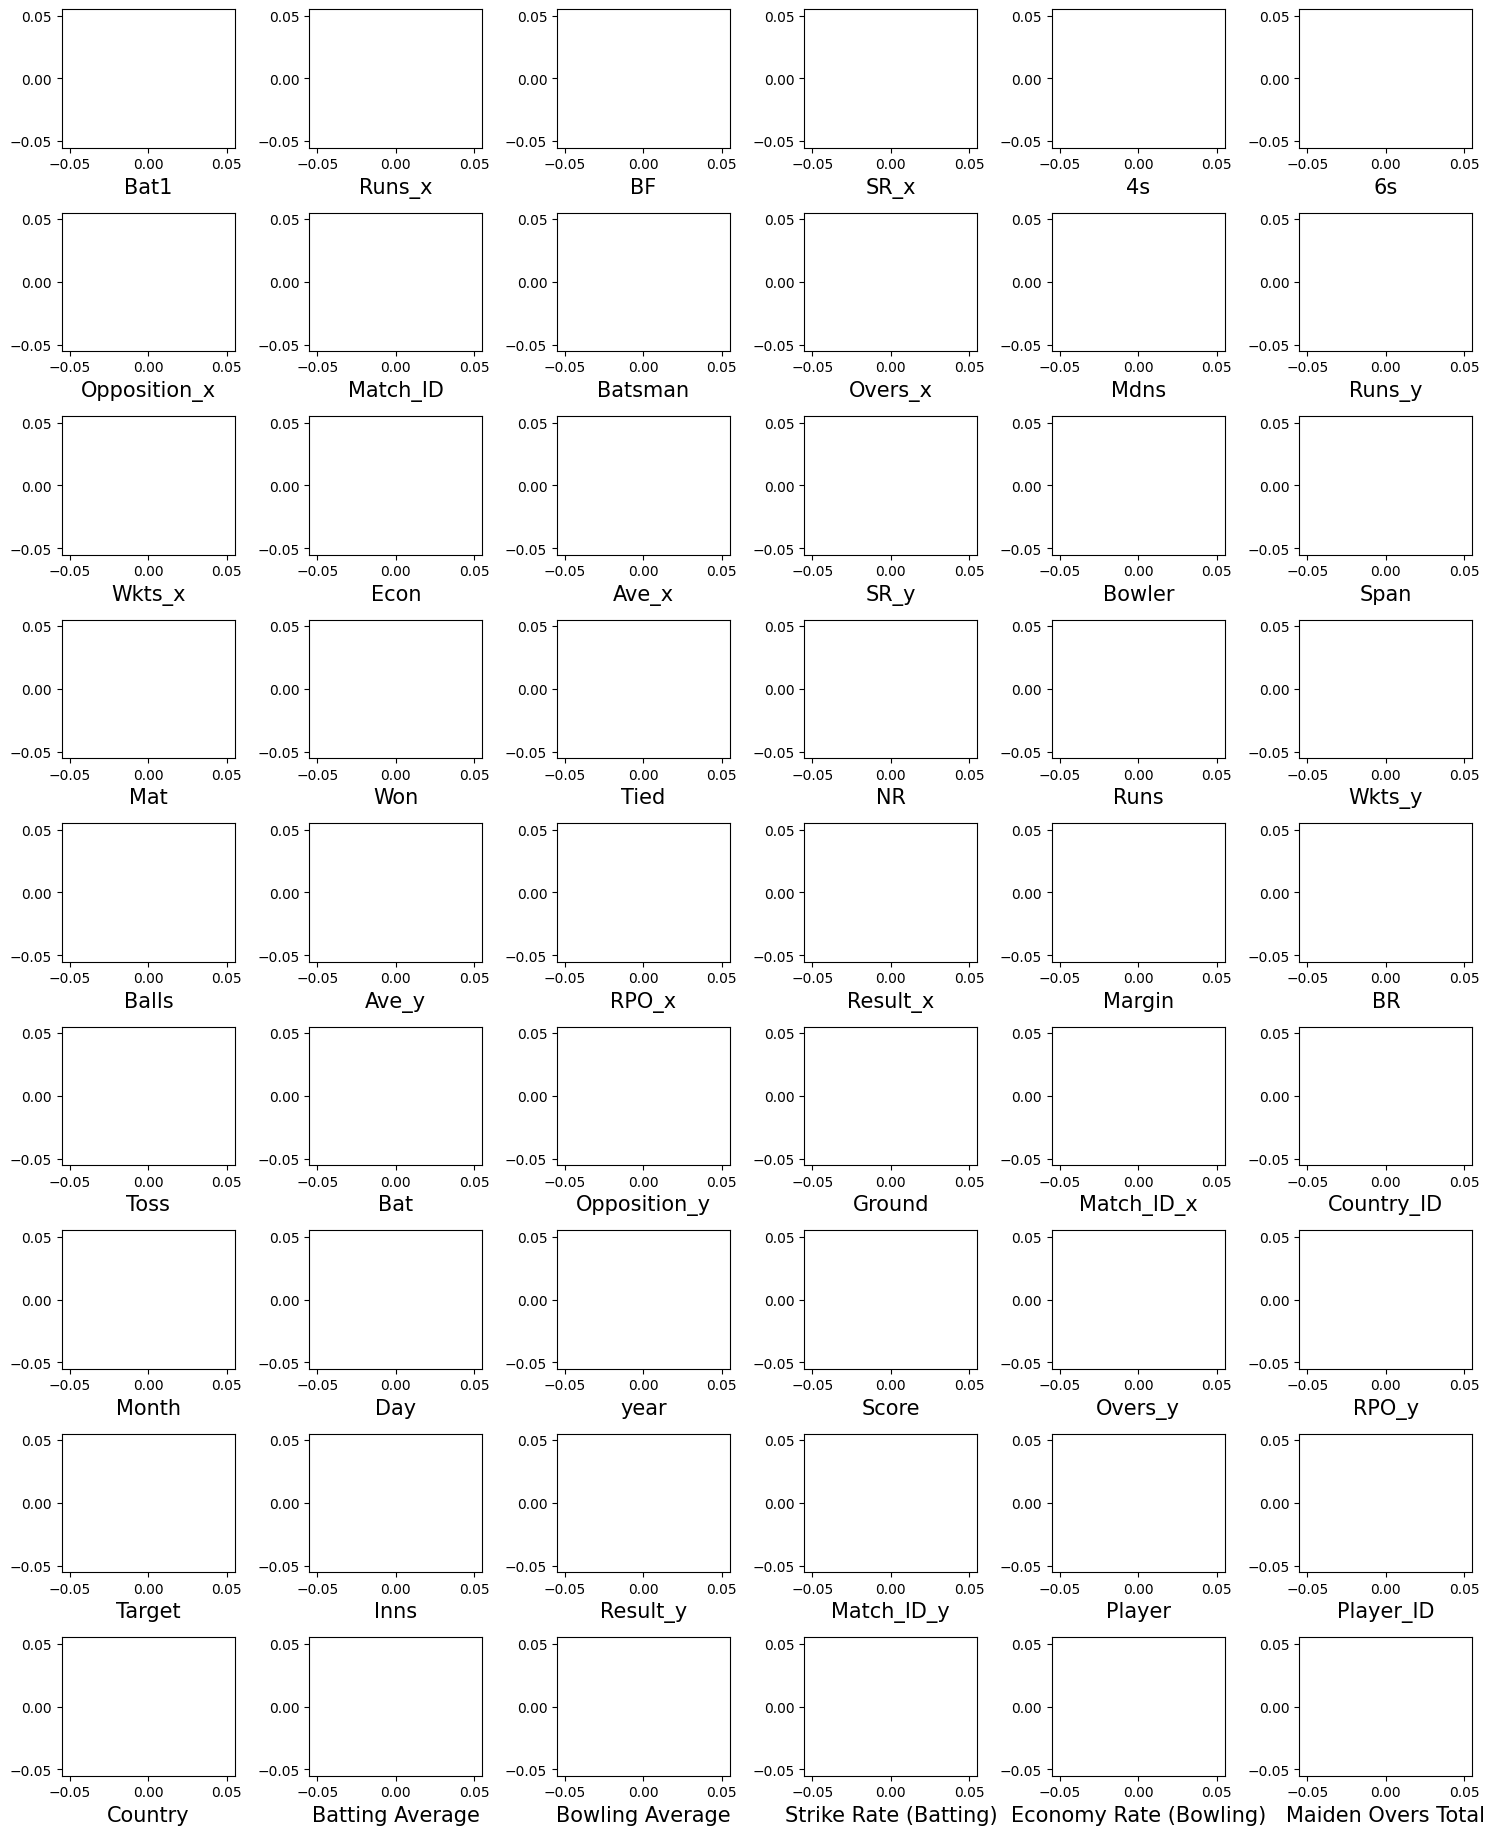

In [75]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in master_after_join:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(master_after_join[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [78]:
skew_col=['4s','6s','Ground','Player_ID','Overs_x','Mdns','Runs_y','Wkts_x','Econ','Ave_x','SR_y','Mat','Won','Runs', 'Wkts_y', 'Balls', 'Ave_y', 'RPO_x','BR','Country_ID','Bowling Average','Bowling Average','Economy Rate (Bowling)']
len(skew_col)

23

In [84]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

NameError: name 'x_scaled' is not defined

In [86]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'])
pca_x

NameError: name 'PCA' is not defined